In [3]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

# Import the dataset
df = pd.read_csv('cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [5]:
X = df['LIMIT_BAL'].values.reshape(-1,1)
print(X)

[[ 20000]
 [120000]
 [ 90000]
 ...
 [ 30000]
 [ 80000]
 [ 50000]]


In [6]:
y = df['default payment next month'].values
print(y)

[1 1 0 ... 1 1 1]


_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values, 
                                                    test_size=0.3, random_state=20)

# Import Logisticregression model
from sklearn.linear_model import LogisticRegression

# Creating an instance
log_regressor = LogisticRegression(solver='lbfgs',max_iter=100)

# Fitting the model
log_regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [61]:
# Prediction
y_pred_test = log_regressor.predict_proba(X_test)

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [62]:
# ROC-AUC score for test data
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_test[:,1])

0.6258736627798472

_________________________________________________________________________
**Now, plot the ROC curve.**


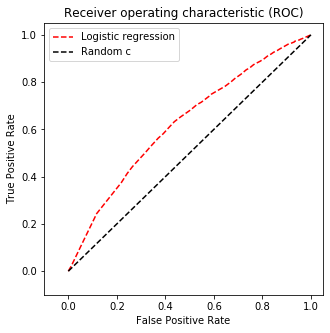

In [63]:
# ROC curve for test data
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve( y_test, y_pred_test[:,1])
plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, 'r--')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.1, 1.05])
plt.ylim([-0.1, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(['Logistic regression', 'Random c'])
plt.show()

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [64]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds_1 = precision_recall_curve(y_test, y_pred_test[:,1])

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


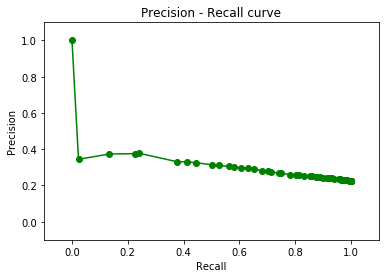

In [65]:
# Precision Recall curve for test data
plt.plot(recall, precision, '-o', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision - Recall curve')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.show()

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [66]:
from sklearn.metrics import auc
auc = auc(recall,precision)
print(auc)

0.3184971835345579


_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [67]:
# ROC-AUC score for train data
y_pred_train = log_regressor.predict_proba(X_train)
roc_auc_score(y_train, y_pred_train[:,1])

0.6155861864963189

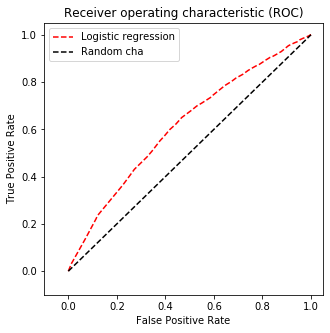

In [68]:
# ROC Curve for Train data
from sklearn.metrics import roc_curve
fpr_2, tpr_2, thresholds_2 = roc_curve( y_train, y_pred_train[:,1])
plt.figure(figsize=(5, 5))
plt.plot( fpr_2, tpr_2, 'r--')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.1, 1.05])
plt.ylim([-0.1, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(['Logistic regression', 'Random cha'])
plt.show()

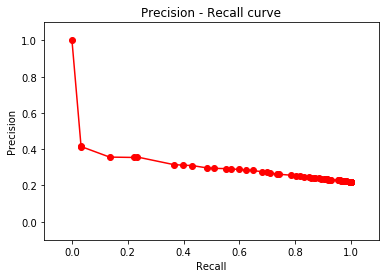

In [69]:
# Precision Recall curve for train data
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds_3 = precision_recall_curve(y_train, y_pred_train[:,1])
plt.plot(recall, precision, '-o', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision - Recall curve')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.show()

In [70]:
# Area under curve for train data
from sklearn.metrics import auc
auc = auc(recall,precision)
print(auc)

0.31392963331777607


    How is this different, conceptually and quantitatively, from your earlier calculation?


**Quantitatively, we can see that the AUC is similar to the testing data ROC, AUC that we calculated before. Both are about 0.61 - 0.62.**

**Conceptually, When we calculate this metric on the training data, we are measuring the model's skill in predicting the same data that had taught the model how to make predictions. We can see how well the model fits the data.** 

**When we compare this to the testing data metric, we are comparing both training and testing scores. If there is much of a difference in these scores, which would be in the form of a higher training score than the testing score, it would indicate that the model fits the data well, the trained model does not perform well to the new and unknown data.**

**But in this case, both the training and testing scores are similar, meaning the model performs well on the unknown data as same as the known data used in model training.**